<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bank-Marketing-Data-Set-(-UCI-Machine-Learning-Repository-)" data-toc-modified-id="Bank-Marketing-Data-Set-(-UCI-Machine-Learning-Repository-)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bank Marketing Data Set ( UCI Machine Learning Repository )</a></span></li><li><span><a href="#Acceso-a-los-datos-y-análisis" data-toc-modified-id="Acceso-a-los-datos-y-análisis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acceso a los datos y análisis</a></span></li><li><span><a href="#Transformación-de-variables" data-toc-modified-id="Transformación-de-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformación de variables</a></span></li><li><span><a href="#Primer-modelo" data-toc-modified-id="Primer-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Primer modelo</a></span></li><li><span><a href="#Cambio-de-medidas-de-rendimiento" data-toc-modified-id="Cambio-de-medidas-de-rendimiento-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cambio de medidas de rendimiento</a></span></li><li><span><a href="#Vamos-a-probar-tres-cosas:" data-toc-modified-id="Vamos-a-probar-tres-cosas:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Vamos a probar tres cosas:</a></span></li><li><span><a href="#Técnicas-para-mejorar-la-transfromación-de-las-variables-categóricas-a-numéricas" data-toc-modified-id="Técnicas-para-mejorar-la-transfromación-de-las-variables-categóricas-a-numéricas-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Técnicas para mejorar la transfromación de las variables categóricas a numéricas</a></span></li><li><span><a href="#Probar-con-polinomiales,-SVM-y-random-forest-o-XGboost" data-toc-modified-id="Probar-con-polinomiales,-SVM-y-random-forest-o-XGboost-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Probar con polinomiales, SVM y random forest o XGboost</a></span></li><li><span><a href="#Feature-engineering:-probar-eliminando-variables,-una-vez-decidida-una-forma-de-transformación-de-variables-y-un-clasificador" data-toc-modified-id="Feature-engineering:-probar-eliminando-variables,-una-vez-decidida-una-forma-de-transformación-de-variables-y-un-clasificador-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature engineering: probar eliminando variables, una vez decidida una forma de transformación de variables y un clasificador</a></span></li><li><span><a href="#Probar-a-eliminar-ejemplos-de-la-categoría-que-más-tiene-(quizás-generar-no-tenga-sentido)" data-toc-modified-id="Probar-a-eliminar-ejemplos-de-la-categoría-que-más-tiene-(quizás-generar-no-tenga-sentido)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Probar a eliminar ejemplos de la categoría que más tiene (quizás generar no tenga sentido)</a></span></li><li><span><a href="#Vamos-a-trabajar-con-el-dataframe-reducido-para-poder-realizar-operaciones-de-mayor-coste-computacional." data-toc-modified-id="Vamos-a-trabajar-con-el-dataframe-reducido-para-poder-realizar-operaciones-de-mayor-coste-computacional.-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Vamos a trabajar con el dataframe reducido para poder realizar operaciones de mayor coste computacional.</a></span></li><li><span><a href="#Después-comprobaremos-si-el-clasificador-generaliza-bien-si-es-entrenado-con-el-dataset-reducido-y-predice-en-el-dataset-completo" data-toc-modified-id="Después-comprobaremos-si-el-clasificador-generaliza-bien-si-es-entrenado-con-el-dataset-reducido-y-predice-en-el-dataset-completo-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Después comprobaremos si el clasificador generaliza bien si es entrenado con el dataset reducido y predice en el dataset completo</a></span></li><li><span><a href="#Primer-modelo-con-el-dataset-reducido" data-toc-modified-id="Primer-modelo-con-el-dataset-reducido-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Primer modelo con el dataset reducido</a></span></li><li><span><a href="#Probamos-con-el-ensemble-XGBoost" data-toc-modified-id="Probamos-con-el-ensemble-XGBoost-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Probamos con el ensemble XGBoost</a></span></li><li><span><a href="#Vamos-a-trabajar-en-la-selección-de-variables-con-Wrappers-y-el-conjunto-reducido" data-toc-modified-id="Vamos-a-trabajar-en-la-selección-de-variables-con-Wrappers-y-el-conjunto-reducido-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Vamos a trabajar en la selección de variables con Wrappers y el conjunto reducido</a></span></li><li><span><a href="#Medidas-de-rendimiento-independientes-del-umbral" data-toc-modified-id="Medidas-de-rendimiento-independientes-del-umbral-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Medidas de rendimiento independientes del umbral</a></span></li><li><span><a href="#Probaremos-ahora-con-técnicas-de-undersampling" data-toc-modified-id="Probaremos-ahora-con-técnicas-de-undersampling-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Probaremos ahora con técnicas de undersampling</a></span></li><li><span><a href="#Selección-de-variables" data-toc-modified-id="Selección-de-variables-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Selección de variables</a></span></li></ul></div>

## Bank Marketing Data Set ( UCI Machine Learning Repository )

In [2]:
#Importamos bibliotecas y clases para el desarrollo del notebook
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Automcompletar rápido
%config IPCompleter.greedy=True
#Display 6 registros
pd.options.display.min_rows = 6

## Acceso a los datos y análisis

In [3]:
#Accedemos primero a los datos y los guardamos en un df para su visualización
df_original = pd.read_csv('bank marketing dataset/bank-additional/bank-additional-full.csv', delimiter = ';')
#Visualizamos el dataset
df_original

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# Barajamos los ejemplos, puesto que parecen estar ordenados los meses y los días de la semana de forma cronológica
df_original = df_original.sample(n = len(df_original), random_state = 42)

In [5]:
#Visualizamos la información del dataset
df_original.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 32884 to 15795
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-n

In [6]:
#Obtenemos una primera información numérica del dataset
df_original.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#df.info ya nos indicaba que no había nulos en el dataset, verificamos
df_original.isna().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [8]:
#Comprobamos si hay registros que se detectan como duplicados
df_original.duplicated().sum()

12

In [9]:
#Sacamos por pantalla esos registros duplicados
df_original[df_original.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36950,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no


In [10]:
#Comprobamos cuántos registros únicos tiene cada variable
df_original.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
#En la información del dataset (UCI) se indica de qué tipo son las distintas variables. Por defecto pandas no 
#identifica correctamente todos los tipos, así que las transformamos para facilitar su manejo. Guardamos en df el
#dataset modificado

tipos = {'job':'category',
         'marital':'category',
         'education':'category',
         'default':'category',
         'housing':'category',
         'loan':'category',
         'contact':'category',
         'month':'category',
         'day_of_week':'category',
         'poutcome':'category',
        }
df = df_original.astype(tipos)

In [12]:
#Eliminamos los duplicados
df.drop_duplicates(inplace = True)

In [13]:
#Comprobamos cómo queda el df tras las modificaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 32884 to 15795
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.con

In [14]:
#Verificamos de nuevo si se ha generado algún nulo con el cambio
df.isna().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [15]:
#Verificamos de nuevo el número de valores únicos del dataframe
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [16]:
# Dividimos las variables en las de entrada y la de salida
df_salida = df['y'].copy()
df.drop('y', axis=1, inplace=True)

# Transformamos la salida a codificación ordinal
df_salida = ce.OrdinalEncoder().fit_transform(df_salida) - 1

In [17]:
df_salida

,y
32884,0
3169,0
32206,0
...,...
38158,1
860,0
15795,0


In [18]:
#Siguiendo las recomendaciones del repositorio UCI donde figura el dataset, vamos a eliminar también la variable
#'duration', pues indica la duración de la llamada en la que se da la respuesta a la oferta del banco. Si la duración
#es 0, no ha habido llamada y la respuesta es 'no'. Además, la duración de la llamada no se sabe hasta que se realiza
#con lo cual es una variable que va a influir mucho en el aprendizaje del modelo pero no dispondremos de ella a la
#hora de predecir sobre nuevos potenciales clientes (evitar data leakage)

In [19]:
#Eliminamos la variable 'duration'
df.drop('duration', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 32884 to 15795
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  campaign        41176 non-null  int64   
 11  pdays           41176 non-null  int64   
 12  previous        41176 non-null  int64   
 13  poutcome        41176 non-null  category
 14  emp.var.rate    41176 non-null  float64 
 15  cons.price.idx  41176 non-null  float64 
 16  cons.conf.idx   41176 non-null  float64 
 17  euribor3

<AxesSubplot:xlabel='y'>

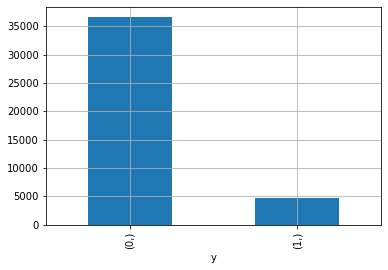

In [20]:
#Vamos a comprobar visualmente si se trata de un problema balanceado o no, haciendo un diagrama de barras de la 
#variable de salida
df_salida.value_counts().plot.bar(grid = True)

In [21]:
df_salida.value_counts()

y
0    36537
1     4639
dtype: int64

In [22]:
#Vemos que el problema está desbalanceado, así que tendremos que tener cuidado con la métrica a utilizar. Quizás
#accuracy no sea la adecuada

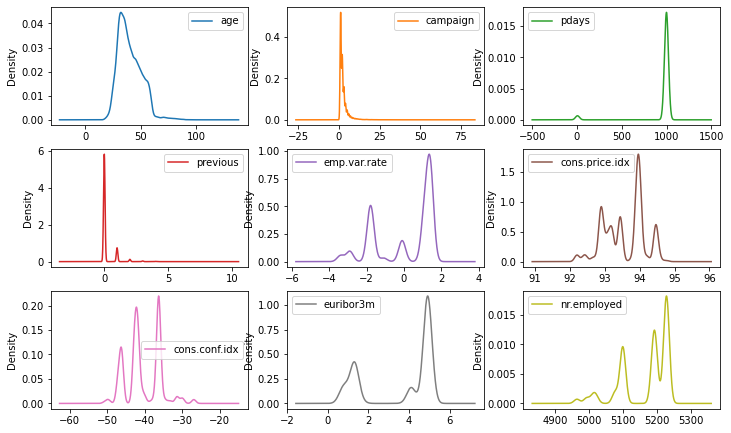

In [23]:
#Sacamos por pantalla los gráficos de densidad sobre variables numéricas del df
df.plot.kde(subplots = True,sharex=False,figsize = (12,10),layout=(4,3));

In [24]:
#Vemos que las variables numéricas no siguen una distribución normal. Existe la posibilidad de aplicar alguna
#transformación, logarítmica o cuadrática, para intentar que estas variables se aproximen más a la normal y los 
#clasificadores que no son independientes de la escala funcionen mejor. Lo probaremos más adelante

In [25]:
#Obtenemos la matriz de Correlación de las diferentes variables numéricas del dataset
df.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
campaign,0.004622,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [26]:
#Vemos que hay varias variables que hacen referencia al contexto económico que tienen una correlación alta entre
#ellas. Ésto puede darnos una pista sobre la posibilidad de eliminar alguna de ellas. Lo veremos más adelante

In [27]:
#En la variable 'pdays' se indica el valor 999 para indicar que a esa persona nunca se le he contactado en 
#campañas previas. Vamos a ver qué valores distintos tiene la variable
df.pdays.unique()

array([999,   3,  10,   6,  13,   4,  12,   5,   9,  15,  14,   7,  16,
         1,   0,   2,  11,   8,  17,  18,  21,  19,  26,  22,  27,  20,
        25])

In [28]:
#Vamos a ver cuántas veces aparece cada valor
df.pdays.value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
27         1
20         1
25         1
Name: pdays, dtype: int64

In [29]:
#Con gran diferencia, el caso más habitual es que no haya habido contacto previo con el cliente.

## Transformación de variables

In [30]:
#Vamos a empezar realizando la transformación de variables categóricas a numéricas con la
#clase ColumnTransformer de Scikit-learn, que permite elegir qué tipo de transformación 
#aplicar a cada tipo de variable. 

In [31]:
# Obtenemos la lista de nombres de variables categóricas con más de 3 valores diferentes
varCatMayor3 = [v for i, v in enumerate(df.columns) if ((len(df[v].unique())>3) & (df.dtypes[i] == 'category')) ]
print(varCatMayor3)
# Obtenemos la lista de nombres de variables categóricas con 3 o menos valores diferentes
varCatMenorIgual3 = [v for i, v in enumerate(df.columns) if ((len(df[v].unique())<=3) & (df.dtypes[i] == 'category')) ]
print(varCatMenorIgual3)

['job', 'marital', 'education', 'month', 'day_of_week']
['default', 'housing', 'loan', 'contact', 'poutcome']


## Primer modelo 

In [32]:
#Probamos a usar una regresión logística por defecto para probar qué resultados proporciona con una primera 
#codificación, targetencoder para las categóricas de más de 3 valores y onehot para las que tienen menos de 3 valores

In [33]:
# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.TargetEncoder(smoothing=0.0000001)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Creamos una Pipeline para resolver el problema de predicción
clf = Pipeline([('preprocesamiento', preprocesamiento),
                ('normalization', MinMaxScaler()),
                ('clasificador', LogisticRegression(max_iter=1500, random_state=12))])

# Entrenamos y evaluamos el rendimiento de la Pipeline
clf.fit(X_train, y_train)
print("Accuracy del modelo en train {:.2f}%".format(clf.score(X_train, y_train)*100))
print("Accuracy del modelo en test {:.2f}%".format(clf.score(X_test, y_test)*100))

Accuracy del modelo en train 89.72%
Accuracy del modelo en test 89.61%


In [33]:
#Vamos a medir el rendimiento con una matriz de confusión para ver qué está acertando y qué no, puesto es un 
#problema desbalanceado. Medimos también el recall medio por clases o roc_auc_score

cm_test = metrics.confusion_matrix(y_test, clf.predict(X_test))
print(cm_test)
roc_test = metrics.roc_auc_score(y_test, clf.predict(X_test))
print(roc_test)

[[7198  110]
 [ 746  182]]
0.5905343459222769


In [34]:
#Al utilizar accuracy como medida de rendimiento, el modelo está obteniendo mejor resultado al considerar, en casi 
#todos los casos, que la respuesta es 'no' (caso 1). Tendremos que utilizar otras métricas para obtener mejores 
#resultados.

## Cambio de medidas de rendimiento

In [35]:
#Vamos a probar ahora a utilizar la métrica f1 en un gridsearchcv de 5 particiones estratificadas, al tratarse de
#un problema no balanceado, para que se conserven los porcentajes de cada clase en las particiones, probando 
#diferentes valores de del hiperparámetro C de la regresión logística

In [37]:
# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.TargetEncoder(smoothing=0.0000001)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Se crea el grid de valores de los híper-parámetros
parameters_Pipeline = {'clasificador__C': [0.1,1.0,10.0]}

# Creamos una Pipeline para resolver el problema de predicción
clf = Pipeline([('preprocesamiento', preprocesamiento),
                ('normalization', MinMaxScaler()),
                ('clasificador', LogisticRegression(max_iter=1500, random_state=12))])

# Se aplica la validación cruzada de 5 particiones
np.random.seed(12)
clfs = GridSearchCV(clf, parameters_Pipeline, cv = model_selection.StratifiedKFold(), n_jobs=-1, return_train_score=True, scoring = 'f1')
clfs.fit(X_train, y_train)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(clfs.best_score_)
print(clfs.best_params_)
resultadosMostrar = zip(clfs.cv_results_['params'],clfs.cv_results_['mean_test_score'],clfs.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()
# Se obtiene el mejor modelo
mejorModelo = clfs.best_estimator_
# Se realiza la predicción de los datos de test con el mejor modelo
predictedPip_test = mejorModelo.predict(X_test)
# test
y_pred = predictedPip_test
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test,y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test,y_pred)}')
print(f'F1score: {metrics.f1_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test, y_pred)}')
print(metrics.classification_report(y_test, y_pred))

0.30443285372493795
{'clasificador__C': 10.0}
0.291 (Train: 0.291) for {'clasificador__C': 0.1}
0.304 (Train: 0.302) for {'clasificador__C': 1.0}
0.304 (Train: 0.304) for {'clasificador__C': 10.0}

Accuracy Score: 0.8961874696454589
ROC AUC score: 0.5910731390257252
Recall score: 0.19719827586206898
F1score: 0.2997542997542998
Confusion Matrix: 
[[7198  110]
 [ 745  183]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.20      0.30       928

    accuracy                           0.90      8236
   macro avg       0.77      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236



In [ ]:
#El resultado sigue siendo una clasificación muy mala del caso 1, en el que los clientes que dirían que sí, que es 
#precisamente la variable que nos interesa

## Vamos a probar tres cosas:
## Técnicas para mejorar la transfromación de las variables categóricas a numéricas
## Probar con polinomiales, SVM y random forest o XGboost
## Feature engineering: probar eliminando variables, una vez decidida una forma de transformación de variables y un clasificador
## Probar a eliminar ejemplos de la categoría que más tiene (quizás generar no tenga sentido)

In [ ]:
#Vamos a probar si modificando la manera de transformar las variables categóricas a numéricas mejoramos

In [48]:
# Creamos las listas con los nombres de los métodos y los métodos de transformación correspondientes
    # Para que funcione el conteo se debe establecer min_group_size a 1.0
nombres = ['ordinal', 'conteo', 'one hot', 'binaria', 'target', 'catboost']
metodos = [ce.OrdinalEncoder(), ce.CountEncoder(min_group_size=1.0), ce.OneHotEncoder(), ce.BinaryEncoder(), ce.TargetEncoder(), ce.CatBoostEncoder()]

# Definimos un grid de valores para todos los encoders salvo el target
parameters_Pipeline = {'clasificador__C': [0.1,1.0, 10.0]}
# Grid de parámetros para target y así poder obtener el mejor valor de smoothing
parameters_Pipeline_targetEncoder = {'clasificador__C': [0.1,1.0, 10.0],
                       'encoder__smoothing': [0.000001, 1.0, 100.0]}

# Variable para obtener el mejor rendimiento
mejorResultado = 0.0
# Recorremos la lista de técnicas para obtener el rendimiento con cada una de ellos
for i, encoder in enumerate(metodos):
    # Mostramos el método de codificación que se está ejecutando
    print(nombres[i])
    # Particionado de los datos en train y test
    X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, stratify=df_salida.values)
    
    # Creamos y entrenamos la Pipeline: el encoder se asigna al objeto que se está utilizando en la iteración del bucle
        # Realizamos la estandarización de los datos de entrada (para train y test) utilizando el método MinMaxScaler
            # Puesto que la codificación One-Hot y la binaria obtienen 0's o 1's es más apropiada que la StandardScaler
    clasPipeline = Pipeline([('encoder', encoder), ('normalization', MinMaxScaler()), ('clasificador', LogisticRegression(max_iter=1500, random_state=12))])
    
    # En función del tipo de encoder elegimos un grid de parámetros u otro
    if (nombres[i]=='target'):
        grid = parameters_Pipeline_targetEncoder
    else:
        grid = parameters_Pipeline
        
    # Se aplica la validación estratificada de 5 particiones
    np.random.seed(12)
    clfs = GridSearchCV(clasPipeline, grid, cv=model_selection.StratifiedKFold(), n_jobs=-1, scoring = 'f1', return_train_score=True)
    clfs.fit(X_train, y_train)
    
    # Si se mejora el mejor resultado se almacenan las propiedades de interés
    if (clfs.best_score_>mejorResultado):
        mejorResultado = clfs.best_score_
        bestMethod = clfs.best_estimator_
        bestParams = clfs.best_params_
    
# Una vez que se ha conseguido la mejor combinación se usa para obtener el resultado en train y test
prTrain = bestMethod.predict(X_train)
f1Train = metrics.f1_score(y_train, prTrain)*100.0
prTest = bestMethod.predict(X_test)
f1Test = metrics.f1_score(y_test, prTest)*100.0
print('La mejor configuración obtiene {:0.2f}% en train y {:0.2f}% en test y es:'.format(f1Train, f1Test))
print(clfs.best_estimator_)

ordinal
conteo
one hot
binaria
target
catboost
La mejor configuración obtiene 36.20% en train y 32.79% en test y es:
Pipeline(steps=[('encoder',
                 CatBoostEncoder(cols=['job', 'marital', 'education', 'default',
                                       'housing', 'loan', 'contact', 'month',
                                       'day_of_week', 'poutcome'])),
                ('normalization', MinMaxScaler()),
                ('clasificador',
                 LogisticRegression(C=10.0, max_iter=1500, random_state=12))])


In [ ]:
#Vemos que mejoramos ligeramente la métrica f1, pero no de forma significativa. Debemos probar otras cosas. Aun así,
#usaremos catboost de ahora en adelante

## Vamos a trabajar con el dataframe reducido para poder realizar operaciones de mayor coste computacional. 
## Después comprobaremos si el clasificador generaliza bien si es entrenado con el dataset reducido y predice en el dataset completo

In [35]:
#Cargamos el df reducido
df_reducido_completo = pd.read_csv('bank marketing dataset/bank-additional/bank-additional.csv', delimiter = ';')
# Barajamos los ejemplos, puesto que parecen estar ordenados los meses y los días de la semana de forma cronológica
df_reducido_completo = df_reducido_completo.sample(n = len(df_reducido_completo), random_state = 42)
#Visualizamos la información del dataset
df_reducido_completo.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 889 to 860
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   

In [36]:
#Realizamos las mismas trasnformaciones que en el dataset original

In [37]:
tipos = {'job':'category',
         'marital':'category',
         'education':'category',
         'default':'category',
         'housing':'category',
         'loan':'category',
         'contact':'category',
         'month':'category',
         'day_of_week':'category',
         'poutcome':'category',
        }
df_reducido = df_reducido_completo.astype(tipos)

In [38]:
df_reducido['y']

889     yes
2669     no
2707     no
       ... 
3092     no
3772     no
860      no
Name: y, Length: 4119, dtype: object

In [39]:
# Dividimos las variables en las de entrada y la de salida
df_salida_reducido = df_reducido['y'].copy()
df_reducido.drop('y', axis=1, inplace=True)

In [40]:
df_salida_reducido

889     yes
2669     no
2707     no
       ... 
3092     no
3772     no
860      no
Name: y, Length: 4119, dtype: object

In [41]:
df_salida_reducido = np.where(df_salida_reducido.str.contains("yes"), 1, 0)

In [42]:
df_salida_reducido

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
df_salida_reducido = pd.Series(df_salida_reducido)

In [44]:
df_salida_reducido.value_counts()

0    3668
1     451
dtype: int64

In [45]:
#Eliminamos la variable 'duration'
df_reducido.drop('duration', axis = 1, inplace = True)
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 889 to 860
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4119 non-null   category
 2   marital         4119 non-null   category
 3   education       4119 non-null   category
 4   default         4119 non-null   category
 5   housing         4119 non-null   category
 6   loan            4119 non-null   category
 7   contact         4119 non-null   category
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  campaign        4119 non-null   int64   
 11  pdays           4119 non-null   int64   
 12  previous        4119 non-null   int64   
 13  poutcome        4119 non-null   category
 14  emp.var.rate    4119 non-null   float64 
 15  cons.price.idx  4119 non-null   float64 
 16  cons.conf.idx   4119 non-null   float64 
 17  euribor3m    

In [46]:
# Obtenemos la lista de nombres de variables categóricas con más de 3 valores diferentes
varCatMayor3 = [v for i, v in enumerate(df_reducido.columns) if ((len(df_reducido[v].unique())>3) & (df_reducido.dtypes[i] == 'category')) ]
print(varCatMayor3)
# Obtenemos la lista de nombres de variables categóricas con 3 o menos valores diferentes
varCatMenorIgual3 = [v for i, v in enumerate(df_reducido.columns) if ((len(df_reducido[v].unique())<=3) & (df_reducido.dtypes[i] == 'category')) ]
print(varCatMenorIgual3)

['job', 'marital', 'education', 'month', 'day_of_week']
['default', 'housing', 'loan', 'contact', 'poutcome']


## Primer modelo con el dataset reducido

In [50]:
#Probamos a introducir polinomiales en la regresión logística

In [52]:
# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, stratify=df_salida_reducido.values)

# Generamos la pipeline y preparamos configuración
pipe = Pipeline([('preprocesamiento', preprocesamiento),
                 ('poly', PolynomialFeatures(1, include_bias=False)),  
                 ('reg', LogisticRegression(penalty='l2',  solver='newton-cg', max_iter=1500, class_weight = 'balanced'))])

# Probamos diferentes valores de grado del polinimio y regularización (grid-search)
grados = np.arange(1, 3)
reg_values = np.geomspace(0.00001, 1e+4, num=5)

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
parameters = {'poly__degree': grados, 'reg__C': reg_values}

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, parameters, cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train_red, y_train_red)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()
# Se obtiene el mejor modelo
mejorModelo = gridsearch.best_estimator_
# Se realiza la predicción de los datos de test con el mejor modelo
predictedPip_test = mejorModelo.predict(X_test)
# test
y_pred = predictedPip_test
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

0.3825700871219267
{'poly__degree': 1, 'reg__C': 56.23413251903491}
0.260 (Train: 0.260) for {'poly__degree': 1, 'reg__C': 1e-05}
0.261 (Train: 0.265) for {'poly__degree': 1, 'reg__C': 0.0017782794100389228}
0.364 (Train: 0.380) for {'poly__degree': 1, 'reg__C': 0.31622776601683794}
0.383 (Train: 0.399) for {'poly__degree': 1, 'reg__C': 56.23413251903491}
0.383 (Train: 0.400) for {'poly__degree': 1, 'reg__C': 10000.0}
0.262 (Train: 0.265) for {'poly__degree': 2, 'reg__C': 1e-05}
0.271 (Train: 0.275) for {'poly__degree': 2, 'reg__C': 0.0017782794100389228}
0.360 (Train: 0.377) for {'poly__degree': 2, 'reg__C': 0.31622776601683794}
0.342 (Train: 0.374) for {'poly__degree': 2, 'reg__C': 56.23413251903491}
0.320 (Train: 0.362) for {'poly__degree': 2, 'reg__C': 10000.0}

Accuracy Score: 0.8261291889266634
ROC AUC score: 0.6701303366174056
Recall score: 0.46875
F1score: 0.37793223284100785
Confusion Matrix: 
[[6369  939]
 [ 493  435]]
              precision    recall  f1-score   support

  

In [53]:
##Vemos que las polinomiales no ayudan a mejorar, pues se queda en grado 1. El recall y el f1 score de la clase 1 
##son algo mayores que en los modelos previos, pero lejos de ser fiables.

In [66]:
#Vamos a probar ahora un SVM

In [54]:
# Importamos la clase svc
from sklearn.svm import SVC

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, stratify=df_salida_reducido.values)

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('svc', SVC())])

# Probamos diferentes valores de grado del polinimio y regularización (grid-search)
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.5, 1, 3]

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
param_grid = {'svc__C': C_values, 'svc__gamma' : gamma_values}

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, param_grid, cv = model_selection.StratifiedKFold(shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train_red, y_train_red)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()
# Se obtiene el mejor modelo
mejorModelo = gridsearch.best_estimator_
# Se realiza la predicción de los datos de test con el mejor modelo
predictedPip_test = mejorModelo.predict(X_test)
# test
y_pred = predictedPip_test
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

0.3240966541475879
{'svc__C': 10, 'svc__gamma': 0.01}
0.000 (Train: 0.000) for {'svc__C': 0.1, 'svc__gamma': 0.001}
0.000 (Train: 0.000) for {'svc__C': 0.1, 'svc__gamma': 0.01}
0.162 (Train: 0.187) for {'svc__C': 0.1, 'svc__gamma': 0.5}
0.101 (Train: 0.136) for {'svc__C': 0.1, 'svc__gamma': 1}
0.049 (Train: 0.071) for {'svc__C': 0.1, 'svc__gamma': 3}
0.000 (Train: 0.000) for {'svc__C': 1, 'svc__gamma': 0.001}
0.042 (Train: 0.070) for {'svc__C': 1, 'svc__gamma': 0.01}
0.299 (Train: 0.316) for {'svc__C': 1, 'svc__gamma': 0.5}
0.289 (Train: 0.320) for {'svc__C': 1, 'svc__gamma': 1}
0.282 (Train: 0.348) for {'svc__C': 1, 'svc__gamma': 3}
0.042 (Train: 0.070) for {'svc__C': 10, 'svc__gamma': 0.001}
0.324 (Train: 0.324) for {'svc__C': 10, 'svc__gamma': 0.01}
0.321 (Train: 0.356) for {'svc__C': 10, 'svc__gamma': 0.5}
0.301 (Train: 0.372) for {'svc__C': 10, 'svc__gamma': 1}
0.308 (Train: 0.398) for {'svc__C': 10, 'svc__gamma': 3}

Accuracy Score: 0.8950947061680428
ROC AUC score: 0.58434250136

In [ ]:
##La SVM estudiada reconoce mucho peor la clase 1 que la regresión logística vista anteriormente
##Vamos a probar un último clasificador y pasaremos a trabajar en las variables, seleccionando a través de wrappers 
##las más representativas

## Probamos con el ensemble XGBoost

In [56]:
import xgboost as xgb 

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, stratify=df_salida_reducido.values)

pipe = Pipeline([('preprocesamiento', preprocesamiento), 
                 ('XGB', xgb.XGBClassifier())])

pipe.fit(X_train_red, y_train_red)

# test
y_pred = pipe.predict(X_test)
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.889388052452647
ROC AUC score: 0.5792453475643131
Recall score: 0.1788793103448276
F1score: 0.2670957361222848
Confusion Matrix: 
[[7159  149]
 [ 762  166]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7308
           1       0.53      0.18      0.27       928

    accuracy                           0.89      8236
   macro avg       0.72      0.58      0.60      8236
weighted avg       0.86      0.89      0.86      8236



/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [87]:
#Los resultados son similares al SVM

## Vamos a trabajar en la selección de variables con Wrappers y el conjunto reducido

In [ ]:
##Probamos como método de selección de variables RFECV, que nos optimiza también el número de variables a seleccionar

In [85]:
# Se importa la librería de selección de variables
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=df_salida_reducido.values)

# Se construye la Pipeline para resolver el problema
pipe = Pipeline([('preprocesamiento', preprocesamiento),
                 ('RFECV', feature_selection.RFECV(LogisticRegression(solver='lbfgs'), n_jobs=-1)),
                 ('poly', PolynomialFeatures(1, include_bias=False)),  
                 ('reg', LogisticRegression(penalty='l2',  solver='newton-cg', max_iter=1500, 
                                            class_weight = 'balanced'))])

# Probamos diferentes valores de grado del polinimio y regularización (grid-search)
grados = np.arange(1, 3)
reg_values = np.geomspace(0.00001, 1e+4, num=5)

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
parameters = {'poly__degree': grados, 'reg__C': reg_values}

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, parameters, cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train_red, y_train_red)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],
                        gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()

# Se obtiene el mejor modelo
mejorModelo = gridsearch.best_estimator_
# Se realiza la predicción de los datos de test con el mejor modelo
predictedPip_test = mejorModelo.predict(X_test)
# test
y_pred = predictedPip_test
# Predicción de los datos de test
y_pred = gridsearch.predict(X_test)


# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
26 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit

0.2731141565183718
{'poly__degree': 1, 'reg__C': 0.0017782794100389228}
nan (Train: nan) for {'poly__degree': 1, 'reg__C': 1e-05}
0.273 (Train: 0.291) for {'poly__degree': 1, 'reg__C': 0.0017782794100389228}
nan (Train: nan) for {'poly__degree': 1, 'reg__C': 0.31622776601683794}
nan (Train: nan) for {'poly__degree': 1, 'reg__C': 56.23413251903491}
nan (Train: nan) for {'poly__degree': 1, 'reg__C': 10000.0}
nan (Train: nan) for {'poly__degree': 2, 'reg__C': 1e-05}
nan (Train: nan) for {'poly__degree': 2, 'reg__C': 0.0017782794100389228}
nan (Train: nan) for {'poly__degree': 2, 'reg__C': 0.31622776601683794}
nan (Train: nan) for {'poly__degree': 2, 'reg__C': 56.23413251903491}
nan (Train: nan) for {'poly__degree': 2, 'reg__C': 10000.0}

Accuracy Score: 0.8867168528411851
ROC AUC score: 0.6191331417624522
Recall score: 0.27370689655172414
F1score: 0.3525329632199861
Confusion Matrix: 
[[7049  259]
 [ 674  254]]
              precision    recall  f1-score   support

           0       0.91

In [ ]:
#No vemos mejoría con esta técnica de selección de variables con el dataset reducido

In [47]:
# Se importa la librería de selección de variables
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=df_salida_reducido.values)

# Se construye la Pipeline para resolver el problema
pipe = Pipeline([('preprocesamiento', preprocesamiento),('RFECV', feature_selection.RFECV(LogisticRegression(solver='lbfgs', max_iter=1000), n_jobs=-1)),
                   ('clasificador', LogisticRegression(solver='newton-cg', max_iter=1000))])

# Entrenamiento de la Pipeline
pipe.fit(X_train_red, y_train_red)
# Predicción de los datos de entrenamiento
prediccionTrain = pipe.predict(X_train_red)
# Cálculo del porcentaje de acierto para los datos de entrenamiento
f1Train = metrics.f1_score(y_train_red, prediccionTrain)*100.0
# Obtenemos el número de variables seleccionadas 
numeroVariablesSeleccionadas = pipe.named_steps['RFECV'].n_features_
# Predicción de los datos de test
y_pred = pipe.predict(X_test)
# Cálculo del porcentaje de acierto para los datos de test
f1Test = metrics.f1_score(y_test, y_pred)*100.0
# Mostramos los resultados
print('Se seleccionan {} variables y el rendimiento en entrenamiento es {:.2f}% y en test {:.2f}%'.format(numeroVariablesSeleccionadas, f1Train,f1Test))

# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

Se seleccionan 3 variables y el rendimiento en entrenamiento es 32.43% y en test 28.24%
Accuracy Score: 0.8950947061680428
ROC AUC score: 0.5843425013683634
Recall score: 0.18318965517241378
F1score: 0.28239202657807305
Confusion Matrix: 
[[7202  106]
 [ 758  170]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7308
           1       0.62      0.18      0.28       928

    accuracy                           0.90      8236
   macro avg       0.76      0.58      0.61      8236
weighted avg       0.87      0.90      0.87      8236



In [86]:
#Probamos sobre el dataset completo, sin aplicar gridsearch por coste computacional

In [87]:
# Se importa la librería de selección de variables
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Se construye la Pipeline para resolver el problema
pipe = Pipeline([('preprocesamiento', preprocesamiento),('RFECV', feature_selection.RFECV(LogisticRegression(solver='lbfgs', max_iter=1000), n_jobs=-1)),
                   ('clasificador', LogisticRegression(solver='newton-cg', max_iter=1000))])

# Entrenamiento de la Pipeline
pipe.fit(X_train, y_train)
# Predicción de los datos de entrenamiento
prediccionTrain = pipe.predict(X_train)
# Cálculo del porcentaje de acierto para los datos de entrenamiento
f1Train = metrics.f1_score(y_train, prediccionTrain)*100.0
# Obtenemos el número de variables seleccionadas 
numeroVariablesSeleccionadas = pipe.named_steps['RFECV'].n_features_
# Predicción de los datos de test
y_pred = pipe.predict(X_test)
# Cálculo del porcentaje de acierto para los datos de test
f1Test = metrics.f1_score(y_test, y_pred)*100.0
# Mostramos los resultados
print('Se seleccionan {} variables y el rendimiento en entrenamiento es {:.2f}% y en test {:.2f}%'.format(numeroVariablesSeleccionadas, f1Train,f1Test))

# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred)}')
print(metrics.classification_report(y_test.ravel(), y_pred))

Se seleccionan 18 variables y el rendimiento en entrenamiento es 30.41% y en test 29.00%
Accuracy Score: 0.8953375424963574
ROC AUC score: 0.5873015873015873
Recall score: 0.1896551724137931
F1score: 0.2899505766062603
Confusion Matrix: 
[[7198  110]
 [ 752  176]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.19      0.29       928

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236



In [ ]:
#Los resultados en el dataset completo van de nuevo hacia una mala clasificación de la variable 1, la de interés. 
#Vamos a intentar trabajar con métricas independientes del umbral y a buscar un nuevo umbral con el que entrenar 
#un clasificador con un nuevo umbral más ajustado a los datos del problema

## Medidas de rendimiento independientes del umbral

In [88]:
# Función para realizar la clasificación en base a un umbral y las probabilidades de que los ejemplos sean de la clase positiva
def clasificacion_umbral(probs_clase_positiva, umbral=0.5):
    return (probs_clase_positiva >= umbral).astype('int')

In [89]:
# función para calcular el mejor umbral de un modelo (model) de acuerdo a una métrica de rendimiento (metric)
    # y los ejemplos de train (X_train, y_train) y validación (X_val, y_val)
def calcular_mejor_umbral(model, X_train, y_train, X_val, y_val, metric='fscore'):    
    # predecimos las probabilidades de predecir cada ejemplo de train en cada clase 
        # y nos quedamos con las predicciones de la clase positiva (1): segunda columna
    if hasattr(model, 'predict_proba'):
        model_probs = model.predict_proba(X_train)
        model_probs = model_probs[:, 1]
        model_probs_val = model.predict_proba(X_val)
        model_probs_val = model_probs_val[:, 1]
    else:
        model_probs = model.decision_function(X_train)
        model_probs_val = model.decision_function(X_val)
        
    if (metric=='fscore'):
        # calculamos todos los pares de puntos (recall, precision) y sus umbrales
        model_precision, model_recall, umbrales = metrics.precision_recall_curve(y_train, model_probs)  
#         umbrales = np.arange(0,1,0.01)
        rendimiento_umbrales = [metrics.f1_score(y_val, clasificacion_umbral(model_probs_val, t))*100.0 for t in umbrales]
        # Se consigue el mejor umbral
        indiceMejorUmbral = np.argmax(rendimiento_umbrales)
    elif (metric=='auc'):
        # calculamos todos los pares de puntos (fpr, tpr) y sus umbrales
        model_fpr, model_tpr, umbrales = metrics.roc_curve(y_train, model_probs)
#         umbrales = np.arange(0,1,0.01)
        rendimiento_umbrales = [metrics.roc_auc_score(y_val, clasificacion_umbral(model_probs_val, t))*100.0 for t in umbrales]
        # Se consigue el mejor umbral
        indiceMejorUmbral = np.argmax(rendimiento_umbrales)
    elif (metric=='fpr'):
        # calculamos todos los pares de puntos (fpr, tpr) y sus umbrales
        model_fpr, model_tpr, umbrales = metrics.roc_curve(y_train, model_probs)
#         umbrales = np.arange(0,1,0.01)[::-1] # En el orden inverso para no seleccionar el umbral más bajo
        rendimiento_umbrales = np.array([100-metrics.recall_score(y_val, clasificacion_umbral(model_probs_val, t), pos_label=1)*100.0 for t in umbrales])
        # Se obtienen los umbrales que cumplen el criterio y se elige el más cercano a ese 6%
        umbralesValidos = np.where(rendimiento_umbrales<=6.0)
        # Se consigue el umbral: se escoje el primero que lo consigue
        indiceMejorUmbral = umbralesValidos[0][0]
    
    mejorUmbral = umbrales[indiceMejorUmbral]
    print('Mejor umbral={:.3f}, {} en validacion={:.2f}'.format(mejorUmbral, metric, rendimiento_umbrales[indiceMejorUmbral]))
    return mejorUmbral

In [90]:
def imprimeMetricas(y, probs_clase_positiva, umbral):
    clasesPredichasUmbral = clasificacion_umbral(probs_clase_positiva, umbral)
    recallMedioClases = metrics.roc_auc_score(y, probs_clase_positiva)*100.0
    accuracy = metrics.accuracy_score(y, clasesPredichasUmbral)*100.0
    recall = metrics.recall_score(y, clasesPredichasUmbral)*100.0
    precision = metrics.precision_score(y, clasesPredichasUmbral)*100.0
    f1score = metrics.f1_score(y, clasesPredichasUmbral)
    roc_auc = metrics.roc_auc_score(y, clasesPredichasUmbral)
    cm = metrics.confusion_matrix(y, clasesPredichasUmbral)
    print('Accuracy: {:.2f}'.format(accuracy))
    print('Recall medio por clases: {:.2f}'.format(recallMedioClases))
    print('Recall: {:.2f}'.format(recall))
    print('Precision: {:.2f}'.format(precision))
    print('f1score: {:.2f}'.format(f1score))
    print('ROC AUC score: {:.2f}'.format(roc_auc))
    print('confusion matrix: ')
    print(cm)

In [91]:
##Probamos con un clasificador SVM

In [93]:
# Importamos la clase svc
from sklearn.svm import SVC

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=df_salida_reducido.values)
# Dividimos los datos en train y val
X_train_red1, X_val_red, y_train_red1, y_val_red = train_test_split(X_train_red, y_train_red, 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=y_train_red)

# Probamos diferentes valores de grado del polinimio y regularización (grid-search)
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('svc', SVC(probability=True))])

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
param_grid = {'svc__C': C_values, 'svc__gamma' : gamma_values}

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, param_grid, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle=True), 
                          scoring = 'f1', n_jobs = -1,
                          refit = True, return_train_score = True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train_red1, y_train_red1)

# Calculamos el mejor umbral de acuerdo al f-score para tratar de clasificar bien la clase 1
mejorUmbral = calcular_mejor_umbral(gridsearch.best_estimator_, X_train_red1, y_train_red1, X_val_red, y_val_red, metric='auc')
# Imprimimos el mejor umbral y los resultados
print('El mejor umbral es {:.4f}'.format(mejorUmbral))
print('y los resultados en test son:')
imprimeMetricas(y_test, gridsearch.best_estimator_.predict_proba(X_test)[:,1], mejorUmbral)

Mejor umbral=0.089, auc en validacion=65.22
El mejor umbral es 0.0890
y los resultados en test son:
Accuracy: 80.65
Recall medio por clases: 65.45
Recall: 38.36
Precision: 25.83
f1score: 0.31
ROC AUC score: 0.62
confusion matrix: 
[[6286 1022]
 [ 572  356]]


In [103]:
##Con esta modificación tan importante del umbral (pasamos de 0.5 a 0.089), seguimos con valores de predicción 
##similares. No se clasifican bien ni siquiera el 50% de los ejemplos de clase positiva, que es la que nos interesa. 
##Vamos a probar con otro clasificador. Un ensemble RandomForest

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=df_salida_reducido.values)
# Dividimos los datos en train y val
X_train_red1, X_val_red, y_train_red1, y_val_red = train_test_split(X_train_red, y_train_red, 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=y_train_red)

# Creamos una Pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento),('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(max_depth = 8, n_estimators=50, random_state = 42))])
# Entrenamos la Pipeline
    # SE PODRÍA HACER UN GRIDSERACH PARA BUSCAR LOS MEJORES VALORES DE LOS HÍPER-PARÁMETROS DE LA PIPELINE
pipe.fit(X_train_red1, y_train_red1.ravel())
# Calculamos el mejor umbral de acuerdo al f-score para tratar de clasificar bien la clase 1
mejorUmbral = calcular_mejor_umbral(pipe, X_train_red1, y_train_red1, X_val_red, y_val_red, metric='auc')
# Imprimimos el mejor umbral y los resultados
print('El mejor umbral es {:.4f}'.format(mejorUmbral))
print('y los resultados en test son:')
imprimeMetricas(y_test, pipe.predict_proba(X_test)[:,1], mejorUmbral)

Mejor umbral=0.110, auc en validacion=69.63
El mejor umbral es 0.1100
y los resultados en test son:
Accuracy: 84.62
Recall medio por clases: 74.38
Recall: 44.40
Precision: 35.43
f1score: 0.39
ROC AUC score: 0.67
confusion matrix: 
[[6557  751]
 [ 516  412]]


In [116]:
##Seguimos con el mismo problema, aunque hay una pequeña mejoría respecto al SVM.
##Vamos a intentar ajustar los hiperparámetros del ensemble para mejorar la clasificación

In [95]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_reducido, df_salida_reducido.values.ravel(), 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=df_salida_reducido.values)
# Dividimos los datos en train y val
X_train_red1, X_val_red, y_train_red1, y_val_red = train_test_split(X_train_red, y_train_red, 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=y_train_red)

parameters = {'classifier__max_depth': [None],
              'classifier__criterion': ['gini','entropy'],
              'classifier__min_samples_split': [2, 10, 15],
              'classifier__max_leaf_nodes': [None],
              'classifier__min_samples_leaf': [1,3,5],
              'classifier__n_estimators': [25, 50, 100],
              'classifier__max_samples': [None,0.4, 0.7],
              'classifier__max_features': [4, 5, 6]}

# Creamos una Pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento),('scaler', MinMaxScaler()),
                 ('classifier', RandomForestClassifier(max_depth = 8, n_estimators=50, random_state = 42))])

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, param_grid = parameters, 
                          cv = model_selection.StratifiedKFold(n_splits = 10, shuffle=True), 
                          scoring = 'f1', n_jobs = -1,
                          refit = True, return_train_score = True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train_red1, y_train_red1.ravel())

# Calculamos el mejor umbral de acuerdo al f-score para tratar de clasificar bien la clase No-show
mejorUmbral = calcular_mejor_umbral(gridsearch, X_train_red1, y_train_red1, X_val_red, y_val_red, metric='auc')
# Imprimimos el mejor umbral y los resultados
print('El mejor umbral es {:.4f}'.format(mejorUmbral))
print('y los resultados en test son:')
imprimeMetricas(y_test, gridsearch.predict_proba(X_test)[:,1], mejorUmbral)

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

Mejor umbral=0.114, auc en validacion=70.09
El mejor umbral es 0.1142
y los resultados en test son:
Accuracy: 82.10
Recall medio por clases: 73.03
Recall: 47.20
Precision: 30.80
f1score: 0.37
ROC AUC score: 0.67
confusion matrix: 
[[6324  984]
 [ 490  438]]


In [96]:
##Los valores no mejoran de forma significativa ajustando los hiperparámetros del clasificador

## Probaremos ahora con técnicas de undersampling

In [97]:
#Vamos a trabajar sobre los datos iniciales, a través de técnicas de undersampling

from imblearn.under_sampling import OneSidedSelection
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, 
                                                    stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

oss = OneSidedSelection(sampling_strategy = 'majority', random_state=42)

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('oss', oss), 
                 ('clasificador', LogisticRegression(max_iter=1500, random_state=12))])

# Entrenamos la Pipeline
pipe.fit(X_train, y_train.ravel())

# val
y_pred_val = pipe.predict(X_val)
# performance
print('Valores en validacion')
print(f'Accuracy Score: {metrics.accuracy_score(y_val.ravel(),y_pred_val)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_val.ravel(), y_pred_val)}')
print(f'Recall score: {metrics.recall_score(y_val.ravel(),y_pred_val)}')
print(f'F1score: {metrics.f1_score(y_val.ravel(),y_pred_val)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_val.ravel(), y_pred_val)}')
print(metrics.classification_report(y_val.ravel(), y_pred_val))

# test
y_pred_test = pipe.predict(X_test)
# performance
print('\nValores en test')
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred_test)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred_test)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred_test)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred_test)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred_test)}')
print(metrics.classification_report(y_test.ravel(), y_pred_test))

Valores en validacion
Accuracy Score: 0.8976927747419551
ROC AUC score: 0.6234811187044289
Recall score: 0.2695417789757412
F1score: 0.37243947858473003
Confusion Matrix: 
[[2857   66]
 [ 271  100]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2923
           1       0.60      0.27      0.37       371

    accuracy                           0.90      3294
   macro avg       0.76      0.62      0.66      3294
weighted avg       0.88      0.90      0.88      3294


Valores en test
Accuracy Score: 0.8921806702282662
ROC AUC score: 0.6048080870279146
Recall score: 0.2338362068965517
F1score: 0.32829046898638425
Confusion Matrix: 
[[7131  177]
 [ 711  217]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.55      0.23      0.33       928

    accuracy                           0.89      8236
   macro avg       0.73      0.60      0.63      8236
weighted

In [112]:
##Los resultados son similares a los obtenidos al inicio. Se consideran casi todos los ejemplos como clase negativa.
##Vamos a realizar un gridsearch para intentar ajustar hiperparámetros y mejorar

In [99]:
from imblearn.under_sampling import OneSidedSelection
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, 
                                                    stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

oss = OneSidedSelection(sampling_strategy = 'majority', random_state=42)

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('oss', oss), 
                 ('poly', PolynomialFeatures(1, include_bias=False)),  
                 ('reg', LogisticRegression(penalty='l2',  solver='newton-cg', max_iter=1500, 
                                            class_weight = 'balanced'))])

# Probamos diferentes valores de grado del polinimio y regularización (grid-search)
grados = np.arange(1, 3)
reg_values = np.geomspace(0.00001, 1e+4, num=5)

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
parameters = {'poly__degree': grados, 'reg__C': reg_values}

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, parameters, cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train, y_train)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()

# val
y_pred_val = gridsearch.predict(X_val)
# performance
print('Valores en validacion')
print(f'Accuracy Score: {metrics.accuracy_score(y_val.ravel(),y_pred_val)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_val.ravel(), y_pred_val)}')
print(f'Recall score: {metrics.recall_score(y_val.ravel(),y_pred_val)}')
print(f'F1score: {metrics.f1_score(y_val.ravel(),y_pred_val)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_val.ravel(), y_pred_val)}')
print(metrics.classification_report(y_val.ravel(), y_pred_val))

# test
y_pred_test = gridsearch.predict(X_test)
# performance
print('\nValores en test')
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred_test)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred_test)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred_test)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred_test)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred_test)}')
print(metrics.classification_report(y_test.ravel(), y_pred_test))

0.353831217586505
{'poly__degree': 1, 'reg__C': 10000.0}
0.272 (Train: 0.272) for {'poly__degree': 1, 'reg__C': 1e-05}
0.276 (Train: 0.276) for {'poly__degree': 1, 'reg__C': 0.0017782794100389228}
0.353 (Train: 0.356) for {'poly__degree': 1, 'reg__C': 0.31622776601683794}
0.354 (Train: 0.357) for {'poly__degree': 1, 'reg__C': 56.23413251903491}
0.354 (Train: 0.357) for {'poly__degree': 1, 'reg__C': 10000.0}
0.273 (Train: 0.272) for {'poly__degree': 2, 'reg__C': 1e-05}
0.295 (Train: 0.296) for {'poly__degree': 2, 'reg__C': 0.0017782794100389228}
0.347 (Train: 0.352) for {'poly__degree': 2, 'reg__C': 0.31622776601683794}
0.352 (Train: 0.358) for {'poly__degree': 2, 'reg__C': 56.23413251903491}
0.352 (Train: 0.359) for {'poly__degree': 2, 'reg__C': 10000.0}

Valores en validacion
Accuracy Score: 0.75197328476017
ROC AUC score: 0.6743353439078301
Recall score: 0.5741239892183289
F1score: 0.34271922767497986
Confusion Matrix: 
[[2264  659]
 [ 158  213]]
              precision    recall  f1

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

In [ ]:
##Utilizando undersampling y una regresión logística con polinomiales obtenemos los mejores resultados de todo lo 
##ensayado, aunque siguen estando lejos de ser considerados aceptables.
##Vamos a probar ahora con un clasificador SVM

In [118]:
from imblearn.under_sampling import OneSidedSelection
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, df_salida.values.ravel(), test_size=0.2, random_state=42, 
                                                    stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

oss = OneSidedSelection(sampling_strategy = 'majority', random_state=42)

# Probamos diferentes valores de regularización (grid-search)
C_values = np.geomspace(0.00001, 1e+4, num=6)

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
param_grid = {'svc__C': C_values}

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('oss', oss), ('svc', SVC(class_weight='balanced'))])

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, param_grid, cv = model_selection.StratifiedKFold(shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train, y_train)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()

# val
y_pred_val = gridsearch.predict(X_val)
# performance
print('\nValores en validacion')
print(f'Accuracy Score: {metrics.accuracy_score(y_val.ravel(),y_pred_val)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_val.ravel(), y_pred_val)}')
print(f'Recall score: {metrics.recall_score(y_val.ravel(),y_pred_val)}')
print(f'F1score: {metrics.f1_score(y_val.ravel(),y_pred_val)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_val.ravel(), y_pred_val)}')
print(metrics.classification_report(y_val.ravel(), y_pred_val))

# test
y_pred_test = gridsearch.predict(X_test)
# performance
print('\nValores en test')
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred_test)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred_test)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred_test)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred_test)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred_test)}')
print(metrics.classification_report(y_test.ravel(), y_pred_test))

0.38293621579416337
{'svc__C': 158.48931924611142}
0.081 (Train: 0.081) for {'svc__C': 1e-05}
0.288 (Train: 0.290) for {'svc__C': 0.000630957344480193}
0.281 (Train: 0.284) for {'svc__C': 0.039810717055349734}
0.369 (Train: 0.385) for {'svc__C': 2.5118864315095824}
0.383 (Train: 0.399) for {'svc__C': 158.48931924611142}
0.382 (Train: 0.410) for {'svc__C': 10000.0}


Valores en validacion
Accuracy Score: 0.7868852459016393
ROC AUC score: 0.6681205754527942
Recall score: 0.5148247978436657
F1score: 0.3523985239852399
Confusion Matrix: 
[[2401  522]
 [ 180  191]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2923
           1       0.27      0.51      0.35       371

    accuracy                           0.79      3294
   macro avg       0.60      0.67      0.61      3294
weighted avg       0.86      0.79      0.81      3294


Valores en test
Accuracy Score: 0.7955318115590092
ROC AUC score: 0.6674705801860975
Recall score: 0.5021

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

In [120]:
##Mejoran ligeramente los valores de la regresión logística

## Selección de variables

In [ ]:
##Aplicamos selección de variables: primero eliminamos las correlacionadas de más de 0.85

In [104]:
#Obtenemos la matriz de Correlación de las diferentes variables numéricas del dataset
df.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
campaign,0.004622,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [108]:
#Creamos una copia del dataset original y eliminamos del nuevo dataset las variables euribor3m y nr.employed
df_sup = df.copy()
df_sup.drop(['euribor3m', 'nr.employed'], axis = 1, inplace = True)
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 32884 to 15795
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  campaign        41176 non-null  int64   
 11  pdays           41176 non-null  int64   
 12  previous        41176 non-null  int64   
 13  poutcome        41176 non-null  category
 14  emp.var.rate    41176 non-null  float64 
 15  cons.price.idx  41176 non-null  float64 
 16  cons.conf.idx   41176 non-null  float64 
dtypes: categ

In [ ]:
##Probamos a realizar undersampling y un clasificador SVM con el dataset en el que eliminamos 2 variables con alta
##correlación

In [109]:
from imblearn.under_sampling import OneSidedSelection
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([('enc', ce.CatBoostEncoder(random_state=12)), ('scaler', MinMaxScaler())])
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([('enc', ce.OneHotEncoder()), ('scaler', MinMaxScaler())])

# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)])

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df_sup, df_salida.values.ravel(), test_size=0.2, random_state=42, 
                                                    stratify=df_salida.values)
# Generamos los conjuntos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

oss = OneSidedSelection(sampling_strategy = 'majority', random_state=42)

# Probamos diferentes valores de regularización (grid-search)
C_values = np.geomspace(0.00001, 1e+4, num=6)

# Diccionario de parámetros a probar. Al ser una pipeline, usamos nombre__parámetro
param_grid = {'svc__C': C_values}

#Definimos la pipeline
pipe = Pipeline([('preprocesamiento', preprocesamiento), ('oss', oss), ('svc', SVC(class_weight='balanced'))])

# Generamos el objeto gridsearch
gridsearch = GridSearchCV(pipe, param_grid, cv = model_selection.StratifiedKFold(shuffle=True), 
                          scoring='f1', n_jobs=-1,
                          refit=True, return_train_score=True)

# Lanzamos la búsqueda de parámetros y el ajuste del mejor modelo
gridsearch.fit(X_train, y_train)

# Se imprime el mejor porcentaje de acierto, la mejor configuración y los resultados de todas las configuraciones
print(gridsearch.best_score_)
print(gridsearch.best_params_)
resultadosMostrar = zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score'],gridsearch.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
print()

# val
y_pred_val = gridsearch.predict(X_val)
# performance
print('\nValores en validacion')
print(f'Accuracy Score: {metrics.accuracy_score(y_val.ravel(),y_pred_val)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_val.ravel(), y_pred_val)}')
print(f'Recall score: {metrics.recall_score(y_val.ravel(),y_pred_val)}')
print(f'F1score: {metrics.f1_score(y_val.ravel(),y_pred_val)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_val.ravel(), y_pred_val)}')
print(metrics.classification_report(y_val.ravel(), y_pred_val))

# test
y_pred_test = gridsearch.predict(X_test)
# performance
print('\nValores en test')
print(f'Accuracy Score: {metrics.accuracy_score(y_test.ravel(),y_pred_test)}')
print(f'ROC AUC score: {metrics.roc_auc_score(y_test.ravel(), y_pred_test)}')
print(f'Recall score: {metrics.recall_score(y_test.ravel(),y_pred_test)}')
print(f'F1score: {metrics.f1_score(y_test.ravel(),y_pred_test)}')
print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test.ravel(), y_pred_test)}')
print(metrics.classification_report(y_test.ravel(), y_pred_test))

0.3855696610913997
{'svc__C': 158.48931924611142}
0.041 (Train: 0.041) for {'svc__C': 1e-05}
0.296 (Train: 0.301) for {'svc__C': 0.000630957344480193}
0.280 (Train: 0.281) for {'svc__C': 0.039810717055349734}
0.374 (Train: 0.386) for {'svc__C': 2.5118864315095824}
0.386 (Train: 0.399) for {'svc__C': 158.48931924611142}
0.384 (Train: 0.412) for {'svc__C': 10000.0}


Valores en validacion
Accuracy Score: 0.7868852459016393
ROC AUC score: 0.6681205754527942
Recall score: 0.5148247978436657
F1score: 0.3523985239852399
Confusion Matrix: 
[[2401  522]
 [ 180  191]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2923
           1       0.27      0.51      0.35       371

    accuracy                           0.79      3294
   macro avg       0.60      0.67      0.61      3294
weighted avg       0.86      0.79      0.81      3294


Valores en test
Accuracy Score: 0.7955318115590092
ROC AUC score: 0.6674705801860975
Recall score: 0.50215

/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/miniconda3/envs/py38ml/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/min

In [134]:
##No se observa mejoría en con la eliminación de las variables